Help is available on : https://www.youtube.com/watch?v=u1vLJBwOFC8

In [ ]:
import pandas as pd
df = pd.read_csv('anomaly.csv')

print(df.columns) 
print(df.head())

Index(['Date', 'Power', 'Detector', 'Quality'], dtype='object')
       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good


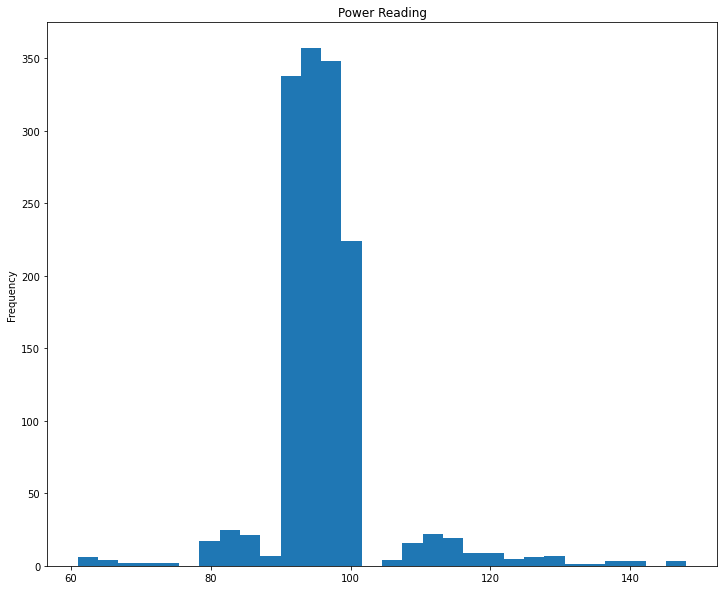

In [ ]:
df['Power'].plot(kind='hist', title='Power Reading', bins=30, figsize=(12,10)) 
#Most values between 90 and 100 with some outliers / anomalies

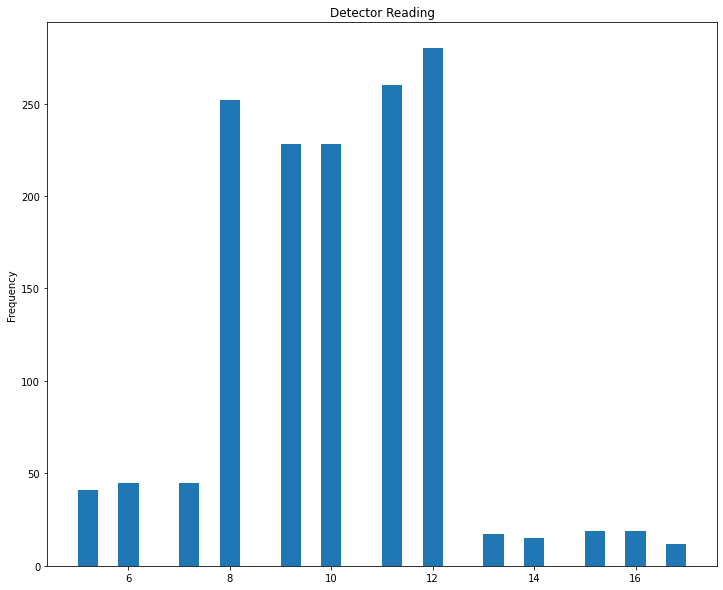

In [ ]:
df['Detector'].plot(kind='hist', title='Detector Reading', bins=30, figsize=(12,10)) 
#Most values between 8 and 12 with some outliers / anomalies

In [ ]:
#To see how the data is spread betwen Good and Bad
print(df.groupby('Quality')['Quality'].count())

Quality
Bad      407
Good    1054
Name: Quality, dtype: int64


In [ ]:
df.drop(['Date'], axis=1, inplace=True)
#print(df.head())

#If there are missing entries, drop them.
df.dropna(inplace=True,axis=1)

In [ ]:
#COnvert non-numeric to numeric
df.Quality[df.Quality == 'Good'] = 1
df.Quality[df.Quality == 'Bad'] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
good_mask = df['Quality']== 1 #All good to be True for good data points
bad_mask = df['Quality']== 2 #All values False for good data points
print(good_mask.head())

0    True
1    True
2    True
3    True
4    True
Name: Quality, dtype: bool


In [ ]:
df.drop('Quality',axis=1,inplace=True)

df_good = df[good_mask]
df_bad = df[bad_mask]

print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

Good count: 1054
Bad count: 407


In [ ]:
# This is the feature vector that goes to the neural net
x_good = df_good.values
x_bad = df_bad.values

from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

print(f"Good train count: {len(x_good_train)}")
print(f"Good test count: {len(x_good_test)}")

Good train count: 790
Good test count: 264


In [ ]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(x_good.shape[1])) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_good_train,x_good_train,verbose=1,epochs=100)

pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 4675.7880
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 4267.7518
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 3852.4171
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 3284.6298
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 2549.4371
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 1802.6026
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 1083.9780
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 515.1662
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 176.6719
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 40.0554
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: 5.9178
Epoch 12/100
25/25 [==============================] - 0s 1ms/step - loss: 1.1028
Epoch 13/10

In [ ]:
pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))

print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Out of Sample Good Score (RMSE): {score2}")
print(f"Bad sample Score (RMSE): {score3}")

Insample Good Score (RMSE): 0.1249398855967821
Out of Sample Good Score (RMSE): 0.12439006223185341
Bad sample Score (RMSE): 0.9900362247753991


----------------------------